#### 2.1 Any of you who have listened to children tell stories will recognize that children differ from adults in that they tend to recall stories as a sequence of actions rather than as an overall plot. Their descriptions of a movie are filled with the phrase “and then. . . .” An experimenter with supreme patience asked 50 children to tell her about a given movie. Among other variables, she counted the number of “and then. . .” statements, which is the dependent variable. The data follow:

data = [10, 11, 12, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 22, 22, 23, 23, 24, 31, 40]

a. Plot an ungrouped frequency distribution for these data.

b. What is the general shape of the distribution?

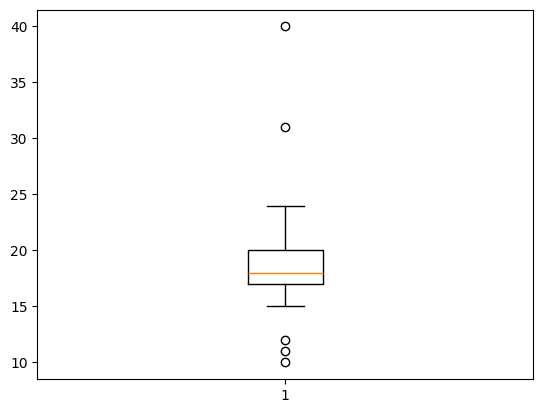

In [1]:
import matplotlib.pyplot as plt
data = [10, 11, 12, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 22, 22, 23, 23, 24, 31, 40]
plt.boxplot(data)
plt.show()

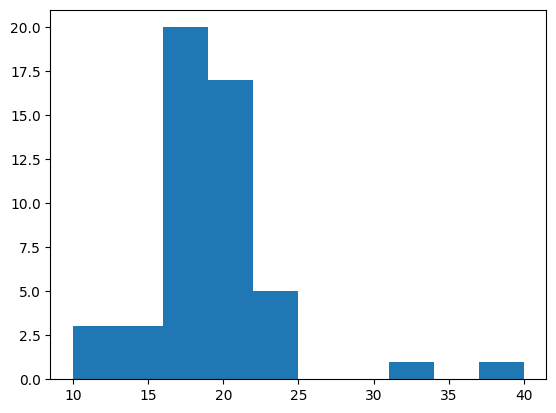

In [2]:
plt.hist(data)
plt.show()

#### 2.4 As part of the study described in Exercise 2.1, the experimenter obtained the same kind of data for 50 adults. The data follow:

data1 = [1, 3, 4, 5, 5, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 14, 14, 14, 15, 15, 15, 16, 16, 17, 147]

a.What can you tell just by looking at these numbers? Do children and adults seem to recall stories in the same way?

b.Plot an ungrouped frequency distribution for these data using the same scale on the axes as you used for the children’s data in Exercise 2.1.

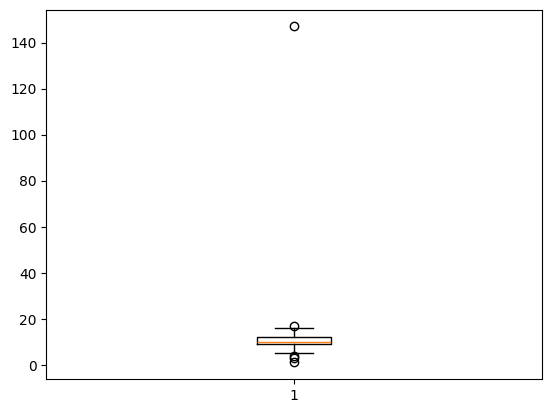

In [3]:
data1 = [1, 3, 4, 5, 5, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 14, 14, 14, 15, 15, 15, 16, 16, 17, 147]
import matplotlib.pyplot as plt
plt.boxplot(data1)
plt.show()

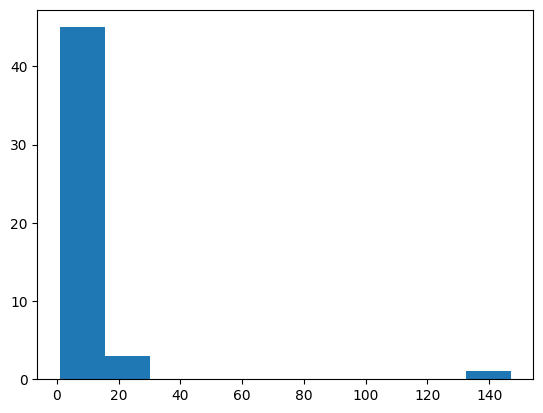

In [4]:
plt.hist(data1)
plt.show()

In [5]:
def t_Test_two_independent_samples(X1,X2,alpha,hypothesized_mean,tail):
    import statistics
    import math
    from scipy.stats import t, ttest_ind
    
    n1 = len(X1)
    n2 = len(X2)
    
    mean_X1 = round(statistics.mean(X1),3)
    mean_X2 = round(statistics.mean(X2),3)
    print(f'mean_X1 = {mean_X1}; mean_X2 = {mean_X2}')

    std_dev_mean_X1 = round(statistics.stdev(X1),3)
    std_dev_mean_X2 = round(statistics.stdev(X2),3)
    print(f'std_dev_mean_X1 = {std_dev_mean_X1}')
    print(f'std_dev_mean_X1 = {std_dev_mean_X2}')
    
    sum_of_X1_list = sum(X1)
    sum_of_X2_list = sum(X2)
    print(f'sum_of_X1_list = {sum_of_X1_list}; sum_of_X2_list = {sum_of_X2_list}')
    
    square_of_each_X1 = [num1**2 for num1 in X1]
    square_of_each_X2 = [num2**2 for num2 in X2]
    
    sum_of_square_of_each_X1 = sum(square_of_each_X1)
    sum_of_square_of_each_X2 = sum(square_of_each_X2)
    print(f'sum_of_square_of_each_X1 = {sum_of_square_of_each_X1}; sum_of_square_of_each_X2 = {sum_of_square_of_each_X2}')
    
    SS1 = round(sum_of_square_of_each_X1 - (sum_of_X1_list**2/n1),3)
    SS2 = round(sum_of_square_of_each_X2 - (sum_of_X2_list**2/n1),3)
    print(f'SS1 = {SS1}; SS2 = {SS2}')
    
    pooled_variance = round((SS1+SS2)/(n1+n2-2),3)
    print(f'pooled_variance = {pooled_variance}')
    
    std_error = round(math.sqrt((pooled_variance/n1)+(pooled_variance/n2)),3)
    print(f'std_error = {std_error}')
    
    t_ratio = round(((mean_X1-mean_X2)-hypothesized_mean)/std_error,3)
    print(f't_ratio = {t_ratio}')

    df = n1+n2-2
    print(f'degrees of freedom = {df}')
    
    t_critical = round(t.ppf(1 - alpha/tail, df),3)
    print(f't_critical = {t_critical}')

    p_value = round(tail * (1 - t.cdf(abs(t_ratio), df)),3)
    print(f'p_value = {p_value}')

    tconf1 = round((mean_X1 - mean_X2) - (t_critical*std_error),3)
    tconf2 = round((mean_X1 - mean_X2) + (t_critical*std_error),3)
    print(f'We have a confidence of {round((1-alpha)*100)}% that the true mean is in between the values of {tconf1} and {tconf2}')

    cohens_d = round((mean_X1 - mean_X2)/math.sqrt(pooled_variance),3)
    print(f"Cohen's d = {cohens_d}")

    t_statistic, pval = ttest_ind(X1,X2)
    p_value = round(pval,6)
    print(f'p_value = {p_value}')

    if t_ratio > t_critical:
        print(f't_ratio = {round(t_ratio,3)} is GREATER than t_critical = {round(t_critical,3)}. Therefore we will REJECT the null hypothesis')
    else:
        print(f't_ratio = {round(t_ratio,3)} is LESS than t_critical = {round(t_critical,3)}. Therefore we will RETAIN the null hypothesis')

In [6]:
total_household = [52799,63401,71120,80776,86789,89479,91066,92830,92347]
family_head_female = [4507,5591,7242,8705,10129,10445,10,608,10,890,10,890]
family_size = [3.33,3.14,2.94,2.76,2.69,2.66,2.64,2.62,2.63]
family_head_male = [total_household[i]-family_head_female[i] for i in range(len(total_household))]
family_head_male

[48292, 57810, 63878, 72071, 76660, 79034, 91056, 92222, 92337]

In [7]:
t_Test_two_independent_samples(family_head_male,family_head_female,0.05,0,2)

mean_X1 = 74817.778; mean_X2 = 4086.417
std_dev_mean_X1 = 15869.724
std_dev_mean_X1 = 4189.371
sum_of_X1_list = 673360; sum_of_X2_list = 49037
sum_of_square_of_each_X1 = 52394084034; sum_of_square_of_each_X2 = 393444749
SS1 = 2014785189.556; SS2 = 126263930.222
pooled_variance = 112686795.778
std_error = 4680.953
t_ratio = 15.11
degrees of freedom = 19
t_critical = 2.093
p_value = 0.0
We have a confidence of 95% that the true mean is in between the values of 60934.126 and 80528.596
Cohen's d = 6.663
p_value = 0.0
t_ratio = 15.11 is GREATER than t_critical = 2.093. Therefore we will REJECT the null hypothesis


In [8]:
t_Test_two_independent_samples(family_head_male,family_size,0.05,0,2)

mean_X1 = 74817.778; mean_X2 = 2.823
std_dev_mean_X1 = 15869.724
std_dev_mean_X1 = 0.258
sum_of_X1_list = 673360; sum_of_X2_list = 25.41
sum_of_square_of_each_X1 = 52394084034; sum_of_square_of_each_X2 = 72.2723
SS1 = 2014785189.556; SS2 = 0.531
pooled_variance = 125924074.38
std_error = 5289.908
t_ratio = 14.143
degrees of freedom = 16
t_critical = 2.12
p_value = 0.0
We have a confidence of 95% that the true mean is in between the values of 63600.35 and 86029.56
Cohen's d = 6.667
p_value = 0.0
t_ratio = 14.143 is GREATER than t_critical = 2.12. Therefore we will REJECT the null hypothesis


In [9]:
t_Test_two_independent_samples(family_head_female,family_size,0.05,0,2)

mean_X1 = 4086.417; mean_X2 = 2.823
std_dev_mean_X1 = 4189.371
std_dev_mean_X1 = 0.258
sum_of_X1_list = 49037; sum_of_X2_list = 25.41
sum_of_square_of_each_X1 = 393444749; sum_of_square_of_each_X2 = 72.2723
SS1 = 193059134.917; SS2 = 18.467
pooled_variance = 10161008.073
std_error = 1405.614
t_ratio = 2.905
degrees of freedom = 19
t_critical = 2.093
p_value = 0.009
We have a confidence of 95% that the true mean is in between the values of 1141.644 and 7025.544
Cohen's d = 1.281
p_value = 0.009074
t_ratio = 2.905 is GREATER than t_critical = 2.093. Therefore we will REJECT the null hypothesis
